In [1]:
from ipynb.fs.full.interpolation_functions import *
import intake
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
eerie_cat=intake.open_catalog("https://raw.githubusercontent.com/eerie-project/intake_catalogues/main/eerie.yaml")

In [3]:
data = eerie_cat["dkrz"]["disk"]["model-output"]["icon-esm-er"]["eerie-control-1950"]["ocean"]["native"]["2d_daily_mean"].to_dask()

In [4]:
grid = xr.open_dataset("/pool/data/ICON/grids/public/mpim/0016/icon_grid_0016_R02B09_O.nc", chunks="auto")
model_lon = grid.clon.values*180./np.pi
model_lat = grid.clat.values*180/np.pi

In [5]:
ntimesteps = 90
startday = 0
a_ice = data.conc[:,0,:]
u_ice = data.ice_u
v_ice = data.ice_v

In [6]:
%%time
# interpolate data from unstructured grid to regular grid
# in north polar stereographic projection
do_everything(a_ice, u_ice, v_ice, model_lon, model_lat,
              ntimesteps, startday, 'data/ice_icon_1950.nc'
             )

0
10
20
30
40
50
60
70
80
CPU times: user 24.6 s, sys: 24.7 s, total: 49.3 s
Wall time: 57.2 s


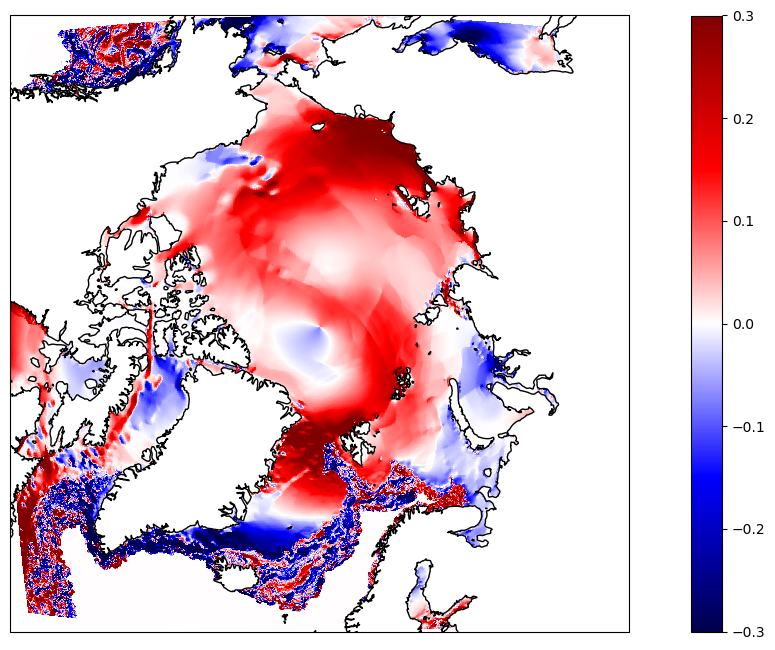

In [8]:
# plot the interpolated data
test = xr.open_dataset('data/ice_icon_1950.nc')

fig = plt.figure(figsize=[16, 8])
ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines(zorder=3)
im = ax.pcolormesh(test.ULON, test.ULAT,
                   test.U.isel(time=30),
                   cmap = 'seismic',
                   vmin=-0.3, vmax=0.3,
                   transform=ccrs.PlateCarree())
plt.colorbar(im)